## First Part of Galaxy zoo exercice, from Kaggle

### Import des différentes librairies

In [124]:
## Differrents libs for the project 
import random
import pandas as pd
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


### Import de la data 

In [20]:
train_set = pd.read_csv('training_solutions_rev1.csv')
img_path = "images_training_rev1/"
files = os.listdir(img_path)

train_set.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [127]:
##Combien y-a-t-il d'exemples ? Quelles sont les classes ? Sont-elles équilibrées ?
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  float64
 19  Class8.1   61578 non-null  float64
 20  Class8

### On affiche de manière random un échantillon afin d'observer les différentes formes de galaxy 

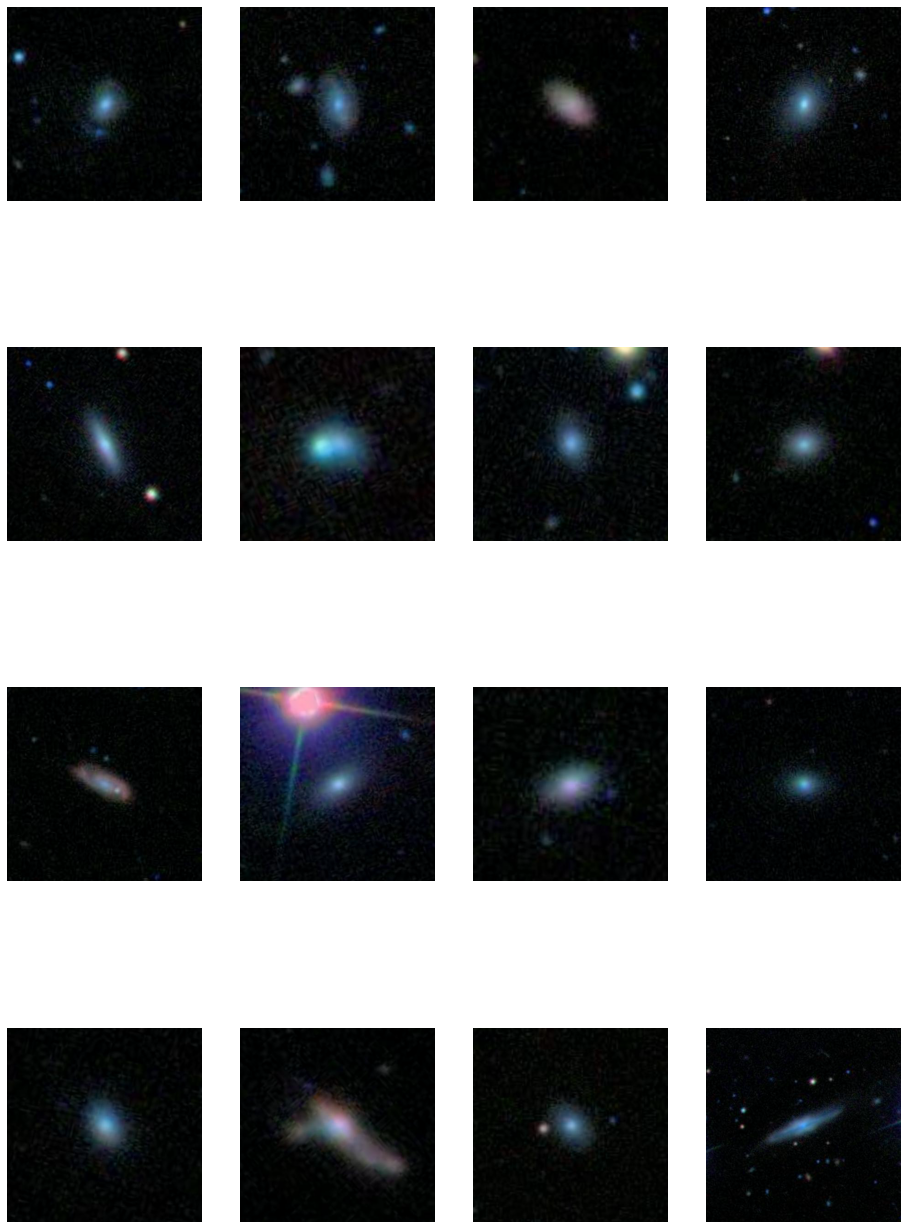

In [4]:
plt.figure(1, figsize=(16, 24))
plt.axis('off')
n = 0
for i in range(16):
    n += 1
    random_img = './images_training_rev1/'+random.choice(files)
    imgs = imread(random_img)
    plt.subplot(4, 4, n)
    plt.axis('off')
    plt.imshow(imgs)

plt.show()

# On divise le dataset en 3 classe préalablement observées 
-Smooth <br>
-Disk <br>
-Artefact <br>

In [5]:
sample1 = train_set.sort_values(by='Class1.1', ascending=False).head(100).copy()
sample2 = train_set.sort_values(by='Class1.2', ascending=False).head(100).copy()
sample3 = train_set.sort_values(by='Class1.3', ascending=False).head(100).copy()

## Global vizualize on differents classes
#### controle  des différents samples, et dimensions images 

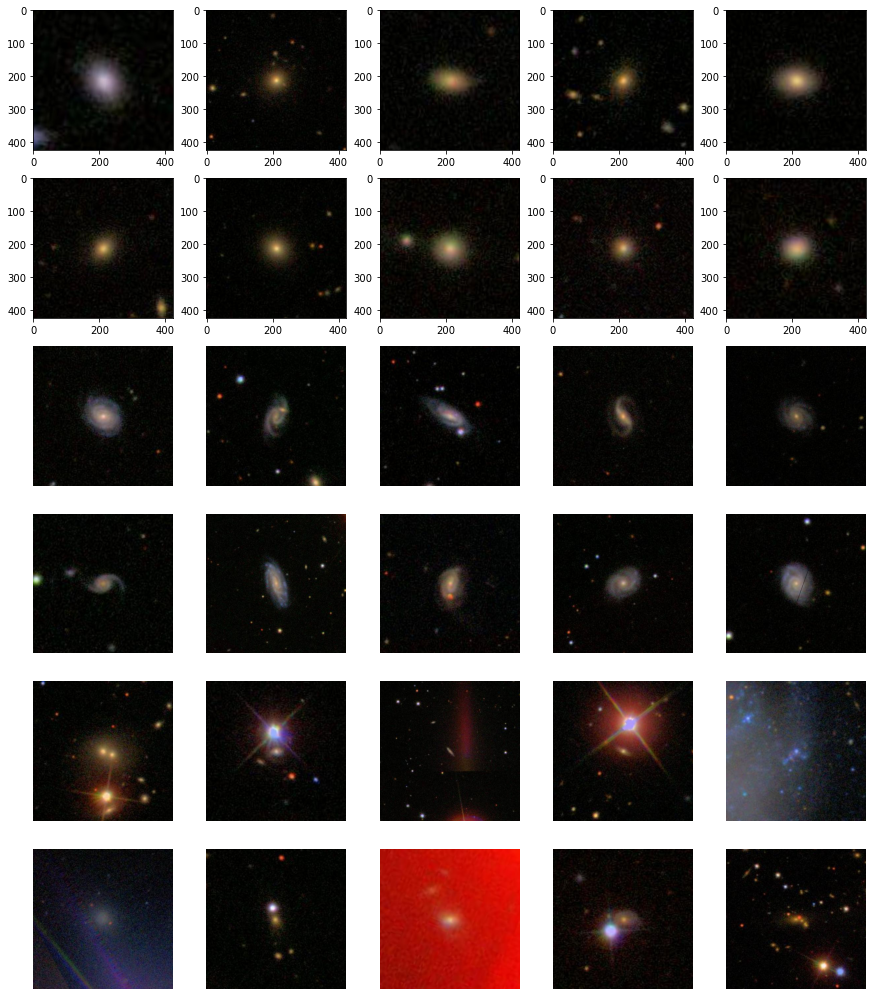

In [34]:
fig = plt.figure(figsize=(15,18))
    
for i in range(10):
    fig.add_subplot(6,5,i+1)
    n = random.randint(0,99)
    plt.imshow(Image.open(img_path+'/'+str(sample1.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+11)
    n = random.randint(0,99)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample2.GalaxyID.values[n])+'.jpg'))
for i in range(10):
    fig.add_subplot(6,5,i+21)
    n = random.randint(0,99)
    plt.axis('off')
    plt.imshow(Image.open(img_path+'/'+str(sample3.GalaxyID.values[n])+'.jpg'))

## Preprocessing

### Travail sur les images 
#### Import via la lib pathlib, puis création de X et y, croping et resize des images 

In [156]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
CUR_DIR = Path.cwd()
img_dir = CUR_DIR/"images_training_rev1"

In [80]:
## on vient parcourir les éléments du dossier pour vérifier l'extension de fichier ".jpg"
files_img = [f for f in img_dir.iterdir() if str(f).endswith(".jpg")]

In [ ]:
##On vient classer les image dans l'ordre afin de les parcourir et les associer ensuite au différentes classes en faisant un test sur leur nom 
sorted(files_img)

In [81]:
##ON vérifie la len 
len(files_img)

61578

### Création de X et y 
#### On parcours files_img avec une incrémentation, on réalise pour chaque itération un test de correspondance entre le nom de fichier img, et la colonne "galaxyID".
#### On réalise le resize, et le crope dans la même boucle afin de ne conserver que l'essentiel de l'image.

In [146]:
X =[]
y=[]
index =0
for i in range(len(files_img)):
    index+=1
    name = np.int64(files_img[i].stem)
    d = train_set.iloc[i:index,:4]
    if name in d["GalaxyID"].values:
        img = cv2.imread(str(files_img[i]))
        croped_img = img[106:319,106:319]
        m = cv2.resize(croped_img, (32,32), interpolation=cv2.INTER_LINEAR)
        m = np.reshape(m,(-1))
        X.append(m)
        t = d[['Class1.1', 'Class1.2', 'Class1.3']]
        t = np.array(t)
        y.append(t[0])
X = np.array(X)
y = np.array(y)

#### Il faut modifier le shape au préalable, afin de pouvoir faire une ACP par la suite 

#### on vérifie le shape de sortie ...

In [ ]:
X.shape, y.shape

#### Cette fonction permet d'identifier la classe qui a la plus forte probabilité d'être cette classe là 

In [151]:
def getClass(line) :
    if (line[0] >= line[1]) & (line[0] >= line[1]) :
        return 0
    if (line[1] >= line[0]) & (line[1] >= line[2]) :
        return 1
    if (line[2] >= line[0]) & (line[2] >= line[1]) :
        return 2

#### On créer un dataframe  contenant les labels de chaque image.

In [152]:
Y_cla = pd.DataFrame()
Y_cla['Class'] = [str(getClass(y[i])) for i in range(len(y))]
Y_cla.head()

,Class
0,1
1,1
2,0
3,0
4,0


In [153]:
## Decoupage en échantillon de train test 
X_train, X_test, y_train, y_test = train_test_split(X, Y_cla, test_size=0.33, random_state=42)

In [154]:
##On vérifie le nbre de dimensions du X_train
X_train.shape

(41257, 3072)

In [157]:
# standardisation
obj_scaler = StandardScaler()
X_train_SC = obj_scaler.fit_transform(X_train)

In [158]:
X_test_SC = obj_scaler.transform(X_test)

### On pratique l'analyse en composante principale 

In [155]:
pca = PCA()
pca.fit(X_train)

PCA()